**Stock Market Prediction And Forecasting Using Stacked LSTM**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
stock=pd.read_csv('/content/stock.csv')

In [4]:
print(stock)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [5]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
stock.shape

(2035, 8)

In [7]:
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df=stock.reset_index()['Total Trade Quantity']

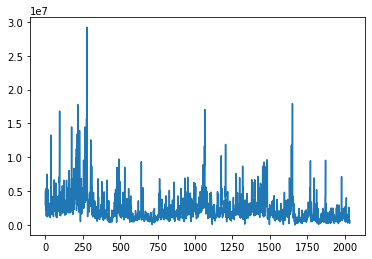

In [9]:
df.plot()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df

array([[0.10395053],
       [0.17300192],
       [0.07551262],
       ...,
       [0.00829126],
       [0.00870291],
       [0.02123589]])

***Train and test split :***

In [12]:
train_size=int(len(df)*0.65)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

***Data Preprocessing :***

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
X_train.shape

(1221, 100)

In [15]:
X_test.shape

(612, 100)

***LSTM :***

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=50,verbose=1)

Epoch 1/10
25/25 [==============================] - 10s 202ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 2/10
25/25 [==============================] - 3s 131ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 3/10
25/25 [==============================] - 3s 134ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 4/10
25/25 [==============================] - 3s 131ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 5/10
25/25 [==============================] - 4s 141ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 6/10
25/25 [==============================] - 4s 170ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 7/10
25/25 [==============================] - 3s 134ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 8/10
25/25 [==============================] - 3s 131ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 9/10
25/25 [==============================] - 3s 131ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 10/10
25/25 [==============================] - 3s 135ms/step - loss: 0.0042 - val_loss: 0.002

***Prediction :***

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
import math
from sklearn.metrics import mean_squared_error

In [23]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.054156716621024316

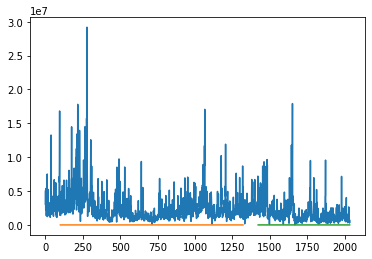

In [24]:
lookback=100
trainPredict=np.empty_like(df)
trainPredict[:, :]=np.nan
trainPredict[lookback:len(train_predict)+lookback, :]=train_predict
testPredict=np.empty_like(df)
testPredict[:, :]=np.nan
testPredict[len(train_predict)+(lookback*2)+1:len(df)-1, :]=test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()

**In above graph,**

Blue line: actual data

Orange line: training data prediction

Green line: testing data prediction